# **Classification**

Predict age of animal given parameters like height or weight. (age = numbers of rings on shell = class)

## 1. data preparing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("abalone_dataset.csv")
df.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [5]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [6]:
df = df.replace({
    "I": 0,
    "M": 1,
    "F": 2
})
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df = pd.DataFrame(df, columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight',
                                 'Shell weight','Rings'])
X = df.drop('Rings', axis = 1)
y = df['Rings']

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X

array([[0.5       , 0.51351351, 0.5210084 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.5       , 0.37162162, 0.35294118, ..., 0.06319947, 0.06826109,
        0.21428571],
       [1.        , 0.61486486, 0.61344538, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.5       , 0.70945946, 0.70588235, ..., 0.37788018, 0.30543099,
        0.28571429],
       [1.        , 0.74324324, 0.72268908, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.5       , 0.85810811, 0.84033613, ..., 0.49506254, 0.49177877,
        0.39285714]])

# 2. finding best parameters 


a) KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=10)
grid_knn.fit(X, y)
grid_knn.best_params_

C:\Users\karol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


{'n_neighbors': 1}

In [11]:
grid_knn.best_score_

0.7428803368788224

b) Random Forest 

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

Random search, because grid search worked slow.

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params_forest={'max_depth':[3,4,5, None],
              'n_estimators':[50,100,110],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(2,5),
              }

rdmsearch_forest = RandomizedSearchCV(forest, param_distributions=params_forest, cv=5)
rdmsearch_forest.fit(X, y)
rdmsearch_forest.best_params_

C:\Users\karol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 3,
 'n_estimators': 50}

In [14]:
rdmsearch_forest.best_score_

0.9035206142738448

c) Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [16]:
parameters_log = [
    {
     'C' : [300,400,500],
     'solver' : ['lbfgs', 'liblinear', 'sag'],
     'max_iter' : [10000,20000]
} ]
log_random = RandomizedSearchCV(log, param_distributions = parameters_log, cv = 5)
log_random.fit(X, y)
log_random.best_params_

C:\Users\karol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'solver': 'sag', 'max_iter': 20000, 'C': 500}

In [17]:
log_random.best_score_

0.8357625419018422

In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
log = LogisticRegression(solver = 'lbfgs', max_iter = 20000, C = 500)
forest = RandomForestClassifier(bootstrap = False,
 criterion = 'entropy',
 max_depth = None,
 max_features = 2,
 min_samples_leaf = 4,
 n_estimators = 100) 

# 3. validation curve

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size=0.20,
                     random_state=1)
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [20]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_forest = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap = False,
 criterion = 'entropy',
 max_depth = None,
 max_features = 2,
 min_samples_leaf = 4,
 n_estimators = 100))

pipe_forest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [21]:
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

train_scores, test_scores = validation_curve(estimator=pipe_forest, X=X_train, y=y_train,
                                          param_name="randomforestclassifier__max_depth",
                                          param_range=param_range, 
                                        cv=4)

C:\Users\karol\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [22]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

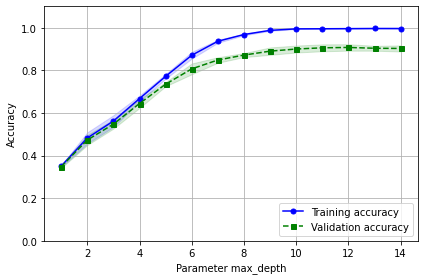

In [23]:
plt.plot(param_range, train_mean, color="blue", marker="o", 
         markersize=5, label="Training accuracy")
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", marker="s",
         linestyle="--", markersize=5, label="Validation accuracy")
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")

plt.grid()
plt.legend(loc='lower right')
plt.xlabel("Parameter max_depth")
plt.ylabel("Accuracy")
plt.ylim([0.0,1.1])
plt.tight_layout()
plt.show()

To a value of 10, accuracy is increasing correctly. For values greater or equal to 10 there's overfitting. 
Accuracy of training set is unfortunately bigger than testing set.

# 4. metrics 

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
knn = KNeighborsClassifier(n_neighbors = 1)
log = LogisticRegression(solver = 'lbfgs', max_iter = 20000, C = 500)
forest = RandomForestClassifier(bootstrap = False,
 criterion = 'entropy',
 max_depth = None,
 max_features = 2,
 min_samples_leaf = 4,
 n_estimators = 100) 


models = [
       knn,
       log,
       forest
    ]

In [26]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [27]:
train_y.shape

(3341,)

In [28]:
models_columns = []
models_compare = pd.DataFrame(columns = models_columns)


row_index = 0
for alg in models:
    
    predicted = alg.fit(train_X, train_y).predict(test_X)
    models_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model'] = models_name
    models_compare.loc[row_index, 'Accuracy'] = accuracy_score(test_y, predicted)
    models_compare.loc[row_index, 'F1'] = f1_score(test_y, predicted, average='weighted')
    models_compare.loc[row_index, 'Precission'] = precision_score(test_y, predicted, average='weighted')
    models_compare.loc[row_index, 'Recall'] = recall_score(test_y, predicted,average='weighted')
    row_index+=1
       
models_compare

C:\Users\karol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWar

,Model,Accuracy,F1,Precission,Recall
0,KNeighborsClassifier,0.763158,0.759781,0.761729,0.763158
1,LogisticRegression,0.879187,0.864901,0.898404,0.879187
2,RandomForestClassifier,0.909091,0.901171,0.900304,0.909091


Random forest is the best model.

# 5. parameters importance

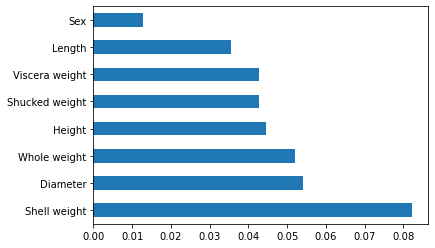

In [29]:
feat_importances = pd.Series(forest.feature_importances_[:-1], index=df.columns[:-1])
feat_importances.nlargest(8).plot(kind='barh')
feat = [feat_importances.nlargest(8).axes[0][i] for i in range(len(feat_importances.nlargest(8).axes[0]))]

In [30]:
!pip install shap

In [31]:
import shap

In [32]:
pred = forest.predict(test_X)
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(test_X)

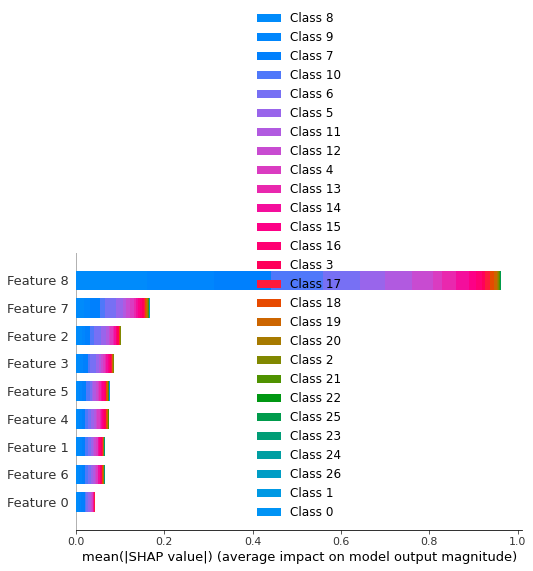

In [33]:
shap.summary_plot(shap_values, X)

We can see that shall weight is the most important parameter and sex has the least influence on predicting age of abalone.